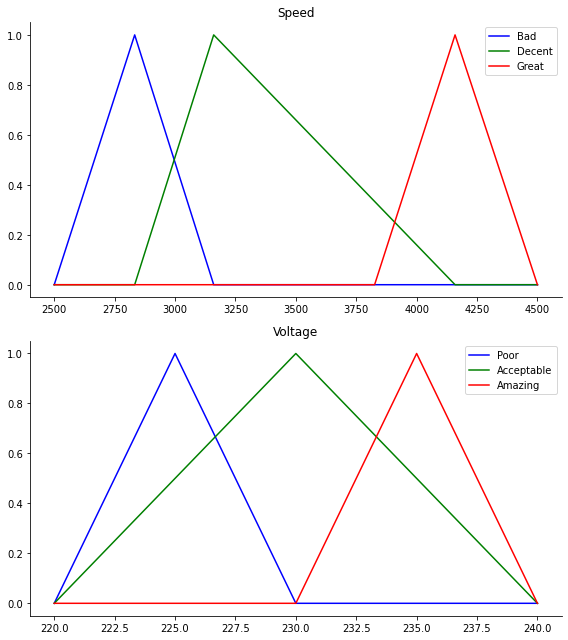

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_speed = np.arange(2500, 4501, 1)
x_voltage = np.arange(220, 241, 1)

speed_lo = fuzz.trimf(x_speed, [2500,2833, 3160])
speed_md = fuzz.trimf(x_speed, [2833,3160,4159])
speed_hi = fuzz.trimf(x_speed, [3826,4159,4500])
voltage_lo = fuzz.trimf(x_voltage, [220,225,230])
voltage_md = fuzz.trimf(x_voltage, [220,230,240])
voltage_hi = fuzz.trimf(x_voltage, [230,235,240])

# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(x_speed, speed_lo, 'b', linewidth=1.5, label='low')
ax0.plot(x_speed, speed_md, 'g', linewidth=1.5, label='avg')
ax0.plot(x_speed, speed_hi, 'r', linewidth=1.5, label='high')
ax0.set_title('Speed')
ax0.legend()

ax1.plot(x_voltage,voltage_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_voltage, voltage_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_voltage, voltage_hi, 'r', linewidth=1.5, label='high')
ax1.set_title('Voltage')
ax1.legend()

for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

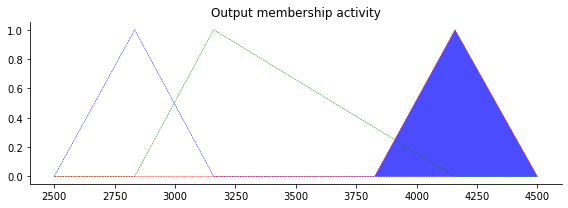

In [10]:
voltage_level_lo = fuzz.interp_membership(x_voltage, voltage_lo, 6.5)
voltage_level_md = fuzz.interp_membership(x_voltage, voltage_md, 6.5)
voltage_level_hi = fuzz.interp_membership(x_voltage, voltage_hi, 6.5)
speed_activation_lo = np.fmax( voltage_level_hi, speed_hi)
speed_activation_md = np.fmin( voltage_level_md, speed_md)
speed_activation_hi = np.fmin( voltage_level_lo, speed_lo)
speed0 = np.zeros_like(x_speed)
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_speed, speed0, speed_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_speed, speed_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_speed, speed0, speed_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_speed, speed_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_speed, speed0, speed_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_speed, speed_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()



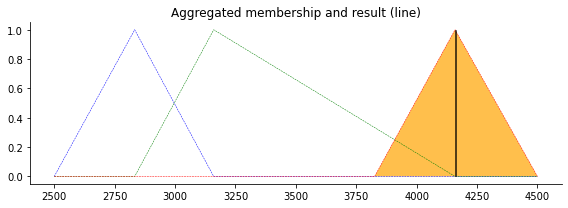

In [11]:
aggregated = np.fmax(speed_activation_lo,
                     np.fmax(speed_activation_md, speed_activation_hi))
speed = fuzz.defuzz(x_speed, aggregated, 'centroid')
speed_activation = fuzz.interp_membership(x_speed, aggregated, speed)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_speed, speed_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_speed, speed_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_speed, speed_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_speed, speed0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([speed, speed], [0, speed_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [3]:
pip install -U scikit-fuzzy


     |████████████████████████████████| 1.0MB 2.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=b720029e67129182a2c29251ce407a04fd42d4e23c9280c81bd569f421893c83
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy
